In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


ImportError: cannot import name 'standardscaler' from 'sklearn.preprocessing' (/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/__init__.py)

In [3]:
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [15]:
def detect_outliers(df):
  outliers={}
  for i in df.columns:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outliers[i]=df[(df[i]<lower)|(df[i]>upper)]

    return outliers


In [16]:
outliers = detect_outliers(df)



In [17]:
outliers

{'MedInc':         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0       8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1       8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 131    11.6017      18.0  8.335052   1.082474       533.0  2.747423     37.84   
 134     8.2049      28.0  6.978947   0.968421       463.0  2.436842     37.83   
 135     8.4010      26.0  7.530806   1.056872       542.0  2.568720     37.83   
 ...        ...       ...       ...        ...         ...       ...       ...   
 20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
 20427   8.6499       4.0  7.236059   1.032528      5495.0  2.553439     34.19   
 20428   8.7288       6.0  8.715842   1.102970      3385.0  3.351485     34.23   
 20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
 20503   8.2787      27.0  6.935065   1.103896       243.0  3.155844     34.33   
 
    

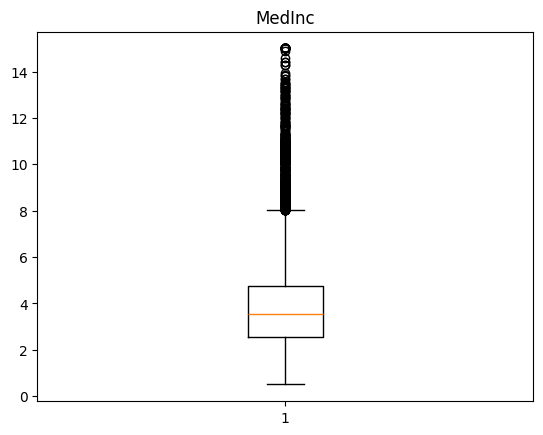

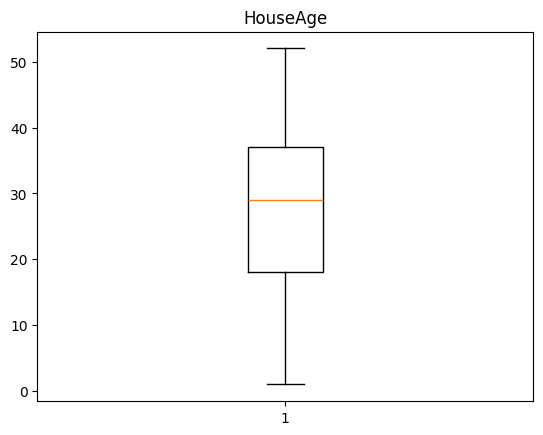

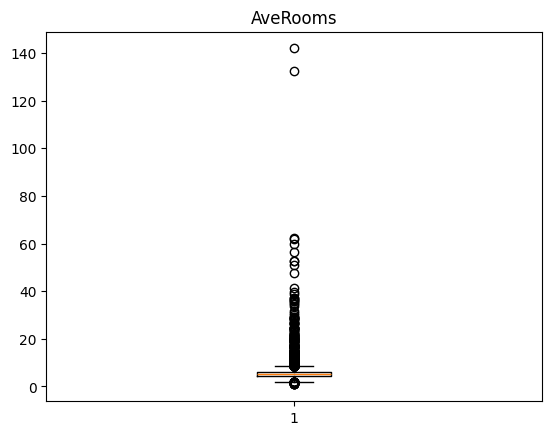

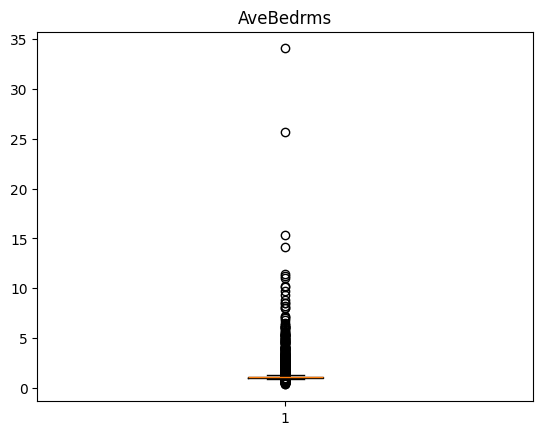

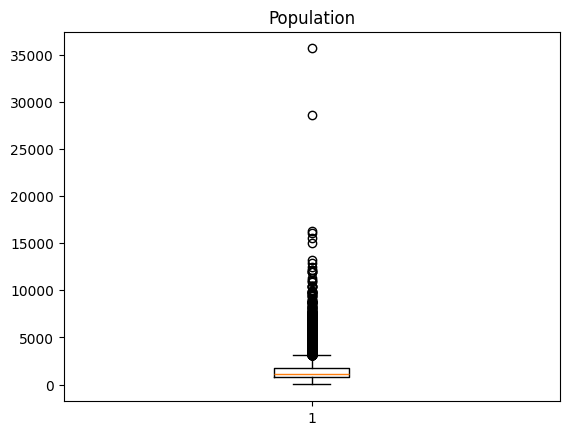

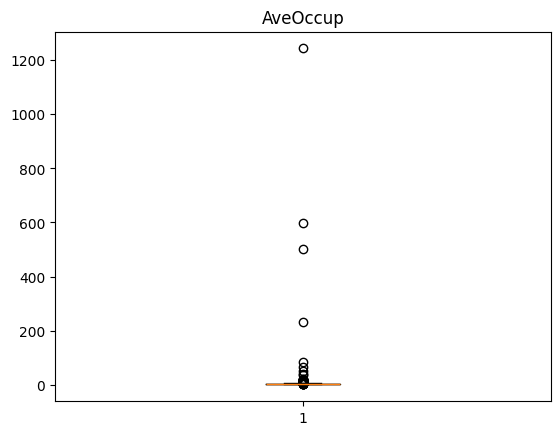

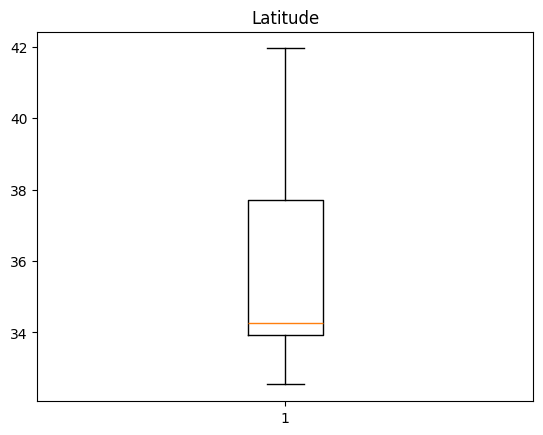

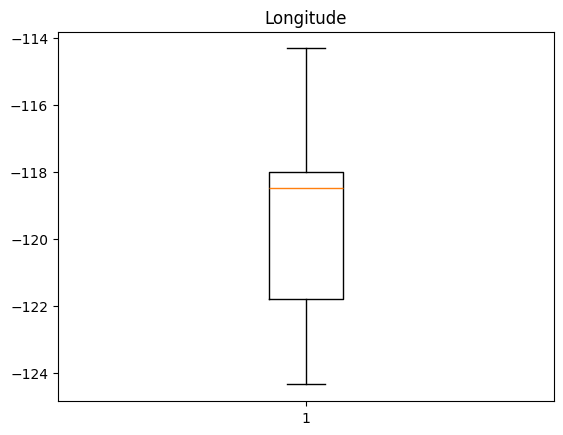

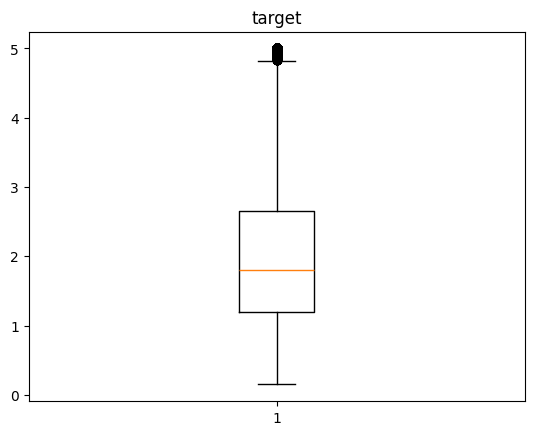

In [11]:
for i in df.columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

In [27]:
df['Population_log']=np.log1p(df['Population'])

{'whiskers': [<matplotlib.lines.Line2D at 0x790c1bdd76e0>,
 'caps': [<matplotlib.lines.Line2D at 0x790c1bdd7fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x790c1bdd7740>],
 'medians': [<matplotlib.lines.Line2D at 0x790c1ba8c470>],
 'fliers': [<matplotlib.lines.Line2D at 0x790c1ba8c6b0>],
 'means': []}

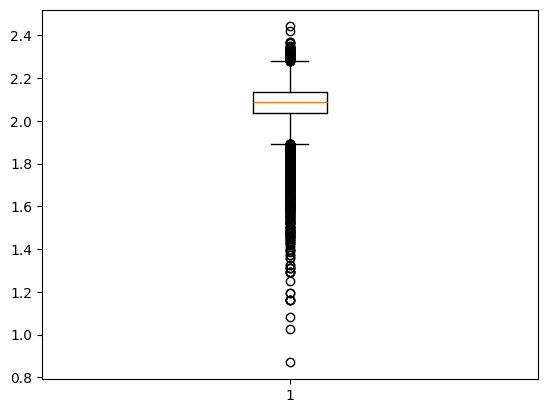

In [29]:
plt.boxplot(df['Population_log'])

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Population_scaled']=scaler.fit_transform(df[['Population_log']])

In [34]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [36]:
df1=pd.read_csv('titanic_cleaned.csv')

In [58]:
le=LabelEncoder()
df1['Sex_encoded']=le.fit_transform(df1['Sex'])
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Familysize', 'isalone',
       'Title', 'AgeGroup', 'Age_scaled', 'Fare_scales', 'Familysize_scaled',
       'Sex_encoded'],
      dtype='object')

In [55]:
ohe = OneHotEncoder(drop="first")
emb_encoded = ohe.fit_transform(df1[["Embarked"]])

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()
df = df.drop("customerID", axis=1)

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

num_cols = X.select_dtypes(include=["int64","float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns


num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])


baseline = Pipeline([
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)
y_prob_base = baseline.predict_proba(X_test)[:,1]

print("WITHOUT SMOTE")
print(classification_report(y_test, y_pred_base))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_base))

smote_model = ImbPipeline([
    ("prep", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

smote_model.fit(X_train, y_train)
y_pred_sm = smote_model.predict(X_test)
y_prob_sm = smote_model.predict_proba(X_test)[:,1]

print("WITH SMOTE")
print(classification_report(y_test, y_pred_sm))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_sm))


WITHOUT SMOTE
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

ROC-AUC: 0.8360739966143986
WITH SMOTE
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

ROC-AUC: 0.8331905410232383


In [61]:
pipeline = ImbPipeline([
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

ROC-AUC: 0.8331905410232383
